# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data Acquisition & Description](#Section4)<br>
5. [Data Pre-processing](#Section5)<br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Post Data Processing & Feature Selection](#Section7)<br>
8. [Model Development & Evaluation](#Section8)<br>
  8.1 [Baseline Models](#Section81)<br>
    - 8.1.1 [Random Forest Classifier](#Section811)<br>
    - 8.1.2 [Multinomial Naive Bayes Classifier](#Section812)<br>
    - 8.1.3 [Logistic Regression](#Section813)<br>

  8.2 [Oversampling Models](#Section82)<br>
    - 8.2.1 [Random Forest Classifier](#Section821)<br>
    - 8.2.2 [Multinomial Naive Bayes Classifier](#Section822)<br>
    - 8.2.3 [Logistic Regression](#Section823)<br>
9. [Conclusion](#Section9)<br>


<a id = Section3></a>
# ** Installing & Importing Libraries**

### **Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install -q yellowbrick                   # A visualization library for Machine Learning
!pip install -q imbalanced-learn              # Toolbox for imbalanced dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.6 MB/s eta 0:00:00


In [ ]:
!pip install -q --upgrade pandas-profiling 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 KB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.3 MB/s eta 0:00:00


### **Importing Libraries**

In [ ]:
# For cmdline interfeace
import os

# Read Zip files
from zipfile import ZipFile

# A powerful HTTP client for python
import urllib

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random data
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# For metrics evaluation
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# For Natural Language Processing
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<a id=Section4></a>
# ** Data Acquisition & Description**

This data set is **based on consumer complaints** and is provided by Consumer Finance Protection Bureau and can be acquired from the <a href="https://www.consumerfinance.gov/data-research/consumer-complaints/">link</a>. The **Consumer Complaint Database** is a collection of complaints about consumer financial products and services that CFPB sent to companies for response.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1511240 | 18 | 890 MB|

| Id | Features | Description |
| :--| :--| :--|
|1|**Date received**|Complaint received date.|
|2|**Product**|Category of product under which complaint was filed.|
|3|**Sub-product**|Category of sub product under which complaint was filed.|
|4|**Issue**|Issue with the product and sub-product under complaint filed.|
|5|**Sub-issue**|Sub-issue with respect to product and sub-product.|
|6|**Consumer complaint narrative**|A complete description of issue about the product|
|7|**Company public response**|A public response broadcasted on the issue.|
|8|**Company**|Name of the Company with which the product is associated.|
|9|**State**|State where the company resides.|
|10|**ZIP code**|Zip code of the area where company resides.|
|11|**Tags**|Tags associated with the product i.e. Servicemember, Older American.|
|12|**Consumer consent provided?**|Whether the consent is provided or not.|
|13|**Submitted via**|Complaint filed via Web, Referral, Phone, Postal mail, Fax, Email|
|14|**Date sent to company**|Date when this issue was forwared to the respective company.|
|15|**Company response to consumer**|Response provided by the company to the consumer.|
|16|**Timely response?**|Response time of the complaint filed by the consumer.|
|17|**Consumer disputed?**|If there was any dispute over the product filed complaint.|
|18|**Complaint ID**| Complaint ID|

In [ ]:
# Download zip file
!wget 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'

# Unzipping
!unzip /content/complaints.csv.zip

Archive:  /content/complaints.csv.zip
  inflating: complaints.csv          


In [ ]:
data = pd.read_csv('complaints.csv')
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-03-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",IL,60449.0,NaN,NaN,Web,2023-03-02,In progress,Yes,NaN,6641624
1,2023-03-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60653.0,NaN,NaN,Web,2023-03-02,In progress,Yes,NaN,6638288
2,2023-03-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",SC,29483.0,NaN,NaN,Web,2023-03-02,In progress,Yes,NaN,6642000
3,2023-03-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,NaN,"EQUIFAX, INC.",FL,33854.0,NaN,NaN,Phone,2023-03-02,In progress,Yes,NaN,6641890
4,2023-03-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",TX,77584.0,NaN,NaN,Web,2023-03-02,In progress,Yes,NaN,6641970


### **Data Description**



In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Complaint ID,1545029.0,2.180434e+06,1.039409e+06,1.0,1344599.0,2470079.0,3062427.0,3586407.0


**Observation:**

- **majority** of **data** is related to **categories**.

### **Data description**



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545029 entries, 0 to 1545028
Data columns (total 18 columns):
Date received                   1545029 non-null object
Product                         1545029 non-null object
Sub-product                     1309864 non-null object
Issue                           1545029 non-null object
Sub-issue                       982047 non-null object
Consumer complaint narrative    510486 non-null object
Company public response         585237 non-null object
Company                         1545029 non-null object
State                           1518866 non-null object
ZIP code                        1399014 non-null object
Tags                            209629 non-null object
Consumer consent provided?      919836 non-null object
Submitted via                   1545029 non-null object
Date sent to company            1545029 non-null object
Company response to consumer    1545028 non-null object
Timely response?                1545029 non-null obj

Some features contain null values, such as Sub-product, Sub-issue, Consumer complaint narrative, Company public response, State, ZIP code, Tags, Consumer consent provided?, Company response to consumer, and Consumer disputed?

Some features are classified with incorrect data types, such as Date received and Date sent to company.

### **Pre-Profiling Report**

In [ ]:
# Have some patience might take some time
profile = ProfileReport(df = data)
profile.to_file(outputfile = 'Pre Profiling Report.html')

Observation:
A total of 20% of the data is missing.

The report shows that there are 17 categorical features and 1 numeric feature.

Features with high cardinality:

[Date received | Sub-product | Issue | Sub-issue | Consumer Complaint Narrative | State | ZIP code | Tags | Date sent to company]

Features with missing data:

Sub-product → 15.2%

Sub-issue → 36.5%

Consumer complaint narrative → 67%

Company public response → 62.1%

State → 1.7%

ZIP code → 9.4%

Tags → 86.4%

Consumer consent provided? → 40.5%

Consumer disputed? → 50.2%

Since there is only one numeric feature, it is not possible to derive correlations or associations between features.



<a id = Section5></a>
# **5. Data Pre-Processing**

### **Identification & Handling of Inconsistent Data Types**: 



**Before changes: Respective Data types per Feature**

In [ ]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64


**Performing Correction**

In [ ]:
data['Date received'] = pd.to_datetime(data['Date received'])
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'])

**After changes: Respective Data types per Feature**

In [ ]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Type,datetime64[ns],object,object,object,object,object,object,object,object,object,object,object,object,datetime64[ns],object,object,object,int64


### **Identification & Handling of Missing Data**

In [ ]:
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (1545029, 18)


Features,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Null Frequency,0.0,0.0,235165.00,0.0,562982.00,1034543.00,959792.00,0.0,26163.00,146015.00,1335400.00,625193.00,0.0,0.0,1.0,0.0,776551.00,0.0
Missing %age,0.0,0.0,15.22,0.0,36.44,66.96,62.12,0.0,1.69,9.45,86.43,40.46,0.0,0.0,0.0,0.0,50.26,0.0


Consumer complaint narrative contains around 67% missing data. We will drop records with null values since it is a potential predictor.

Tags contains around 86% missing data. We will drop this feature.

Sub-product contains 15.2% missing data. We will replace missing values with the mode.

Sub-issue contains 36.4% missing data. We will replace missing values with the mode.

Company public response contains 62% missing data. We will replace missing values with a 'None' label.

State contains 1.7% missing data. We will drop these records.

ZIP code contains 9.45% missing data. We will replace missing values with the mode.

Consumer consent provided? contains 40% missing data. However, since records with missing Consumer complaint narrative will be dropped, the corresponding values here will also be removed. Therefore, we will leave this feature as it is.

Consumer disputed? contains 50% missing data. Although we could drop this feature, we will replace missing values with an 'NA' label for analysis purposes. This feature may be dropped at a later stage.



The dataset has been filtered to include only records with a Consumer Complaint Narrative, as this feature is a key predictor for classifying product categories. The amount of data removed during this filtering process is also presented.

In [ ]:
# Chossing data containing only complaints
before_shape = data.shape
print('Data Shape [Before]:', before_shape)

data = data[pd.notnull(data['Consumer complaint narrative'])]

after_shape = data.shape
print('Data Shape [After]:', data.shape)
print('Total Dropped Records:', before_shape[0]-after_shape[0])
print('Dropped %age:', np.round(((before_shape[0] - after_shape[0])/ before_shape[0]), decimals = 3)*100)

Data Shape [Before]: (1545029, 18)
Data Shape [After]: (510486, 18)
Total Dropped Records: 1034543
Dropped %age: 67.0


In [ ]:
# Analyzing again the missing percentage left
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Features,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Null Frequency,0.0,0.0,52172.00,0.0,130371.00,0.0,261107.00,0.0,1966.00,114574.00,423240.00,0.0,0.0,0.0,1.0,0.0,346419.00,0.0
Missing %age,0.0,0.0,10.22,0.0,25.54,0.0,51.15,0.0,0.39,22.44,82.91,0.0,0.0,0.0,0.0,0.0,67.86,0.0


handling missing data using **central tendency measure** _ Mean/ Median / Mode.

In [ ]:
# Replacing categorcial data with mode value
data['Sub-product'] = data['Sub-product'].replace(np.nan, data['Sub-product'].mode()[0])

data['Sub-issue'] = data['Sub-issue'].replace(np.nan, data['Sub-issue'].mode()[0])

data['ZIP code'] = data['ZIP code'].replace(np.nan, data['ZIP code'].mode()[0])

# Replacing missing data with label
data['Company public response'] = data['Company public response'].replace(np.nan, 'None')

data['Consumer disputed?'] = data['Consumer disputed?'].replace(np.nan, 'NA')

# Dropping data
data.dropna(subset = ['State'], inplace = True)

data.drop(labels = ['Tags', 'Complaint ID'], axis = 1, inplace = True)

visualizing missing data.

In [ ]:
# Analyzing again the missing percentage left
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (508520, 16)


Features,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Identification & Handling of Duplicate Rows**

.

In [ ]:
print('Contains Duplicate Rows? (Original data)', data.duplicated().any())
before_shape = data.shape
print('Data Shape [Before]:', before_shape)
data = data.drop_duplicates()
print('Drop Success!')
after_shape = data.shape
print('Data Shape [After]:', after_shape)

print('Total Dropped Records:', before_shape[0]-after_shape[0])
print('Dropped %age:', np.round(((before_shape[0] - after_shape[0])/ before_shape[0]), decimals = 3)*100)

Contains Duplicate Rows? (Original data) True
Data Shape [Before]: (508520, 16)
Drop Success!
Data Shape [After]: (507049, 16)
Total Dropped Records: 1471
Dropped %age: 0.3


**Observation:**

Some records contain duplicates, with a total count of 1,470.

These duplicate records have been dropped to ensure the integrity of the analysis.



### **Identification & Handling of Duplicate Columns**



In [ ]:
def duplicateCols(dataframe):
  '''Get a list of Duplicate valued Columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

is_duplicate_cols = duplicateCols(data)
if (is_duplicate_cols is None):
  print('No Duplicate Columns')
else:
  print('Contains Duplicate Columns', is_duplicate_cols)

No Duplicate Columns


**Observation:**

no duplicate columns present

### **Post Profiling Report**

In [ ]:
data_profile = data.copy()
profile = ProfileReport(data_profile)
profile.to_file(outputfile = 'Post Profiling Report.html')

**Observation:**
The report shows that there are 8 categorical features, 1 numeric feature, and two constant features that were rejected.

Features with high cardinality:

[Sub-product | Issue | Sub-issue | Consumer Complaint Narrative | Company | State | ZIP code]

The feature Consumer consent provided? has a constant value ("Consent provided") and was therefore rejected for analysis.

The feature Submitted via has a constant value ("Web") and was also rejected for analysis.

<a id = Section6></a>
# **6. Exploratory Data Analysis**

In [ ]:
print('Data Shape:', data.shape)
data.head(2)

Data Shape: (507049, 16)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,None,TRANSWORLD SYSTEMS INC,FL,335XX,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NA
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NA


The main focus of the analysis is to identify the Product. However, some labels in the Product feature are too long, which could pose challenges during data analysis or visualization. To address this, the label size will be reduced by modifying the values.

In [ ]:
product_frame = pd.DataFrame(data['Product'].value_counts())
product_frame.transpose()

,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Credit reporting,Student loan,Checking or savings account,Credit card,Bank account or service,Consumer Loan,Vehicle loan or lease,"Money transfer, virtual currency, or money service","Payday loan, title loan, or personal loan",Payday loan,Money transfers,Prepaid card,Other financial service,Virtual currency
Product,153150,109625,62828,33902,31304,25402,19991,18773,14765,9462,8572,7615,6722,1744,1445,1445,289,15


**Observation:**


Some feature labels are too long, which could pose a challenge during analysis.

The next step is to re-label values for features such as Product and State to simplify the analysis.



In [ ]:
data.replace({'Product':{'Credit reporting, credit repair services, or other personal consumer reports':'Credit reporting, repair, or other'},
               'State':{'UNITED STATES MINOR OUTLYING ISLANDS':'US Minor Islands'}}, inplace = True)

What is the **proportion** of **Consumer Complaints** with respect to the **product**?</h4>

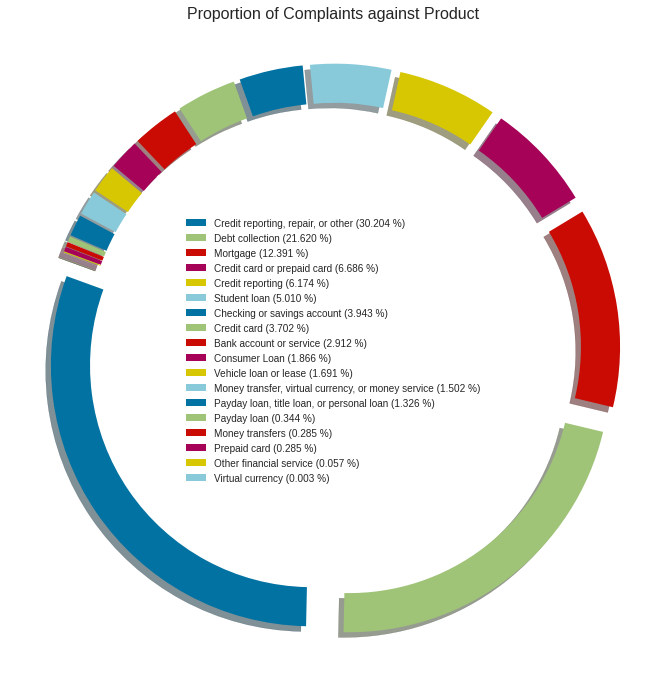

In [ ]:
space = np.ones(18)/10
labels = data['Product'].value_counts().index
sizes = data['Product'].value_counts()/data.shape[0]
plt.figure(figsize = [12, 12])
patches, text, _ = plt.pie(data['Product'].value_counts(), explode = space,  
                                     autopct = '', wedgeprops = dict(width=0.15), 
                                     shadow = True, startangle = 160)
plt.legend(patches, labels=['%s (%1.3f %%)' % (l, s) for l, s in zip(labels, sizes*100)], loc="center")
plt.title('Proportion of Complaints against Product', size = 16)
plt.show()

complaints were more frequent for Credit Reporting, Credit Repair, and Debt Collection compared to other products.



 In which year the **number** of complaints were **more**?</h4>

In [ ]:
high_comp_year = pd.DataFrame(data = data['Date received'].value_counts()[0:20])
high_comp_year.columns = ['Frequency']
high_comp_year.transpose()

,2017-09-08,2017-09-09,2017-01-19,2017-09-13,2017-01-20,2017-09-11,2017-09-14,2019-11-05,2019-08-20,2017-09-12,2019-07-25,2019-10-22,2019-07-30,2019-06-18,2019-08-13,2019-11-13,2018-02-22,2017-04-26,2019-08-07,2018-02-07
Frequency,1875,1350,1009,899,808,614,564,561,561,560,554,553,538,536,535,527,525,525,518,517


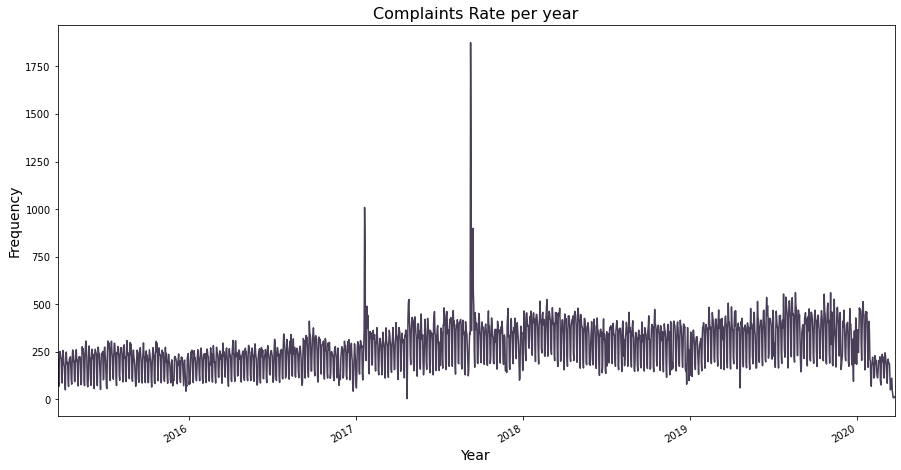

In [ ]:
figure = plt.figure(figsize = [15, 8])
data['Date received'].value_counts().plot(kind = 'line', color = '#493F58')
plt.xlabel('Year', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Complaints Rate per year', size = 16)
plt.show()

**Observation:**
The number of complaints were more between (2017-07 & 2018-09)**, to be more precise around the month of **September in 2017**.

**<h4>Question 3:** What is the **frequency** of **complaints** with respect to each **product**?</h4>

In [ ]:
product_frame = pd.DataFrame(data['Product'].value_counts())
product_frame.transpose()

,"Credit reporting, repair, or other",Debt collection,Mortgage,Credit card or prepaid card,Credit reporting,Student loan,Checking or savings account,Credit card,Bank account or service,Consumer Loan,Vehicle loan or lease,"Money transfer, virtual currency, or money service","Payday loan, title loan, or personal loan",Payday loan,Money transfers,Prepaid card,Other financial service,Virtual currency
Product,152961,109532,62781,33851,31304,25391,19976,18773,14765,9462,8559,7615,6717,1744,1445,1445,289,15


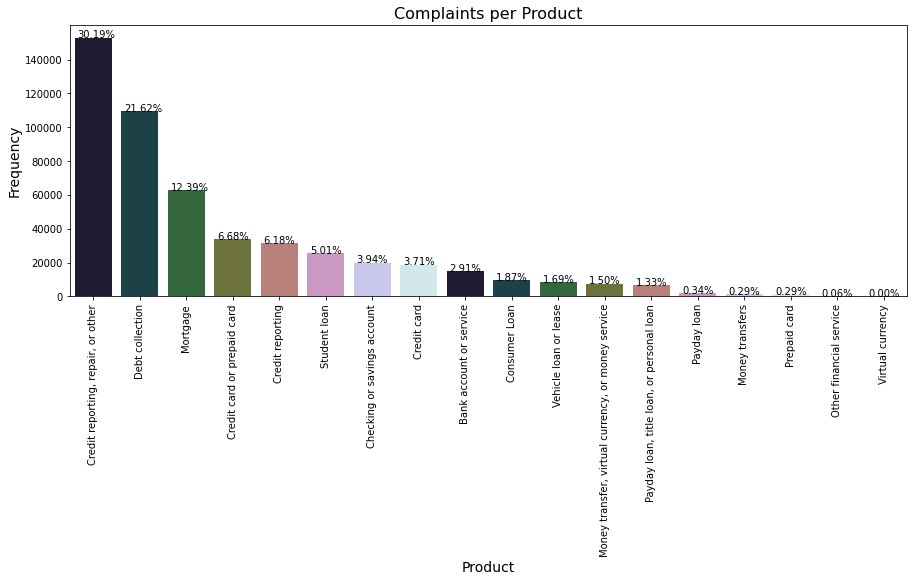

In [ ]:
figure = plt.figure(figsize = [15, 5])

ax = sns.barplot(data['Product'].value_counts().index, data['Product'].value_counts(), palette  = sns.color_palette("cubehelix", 8))

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/ total)
  x = p.get_x() + p.get_width() / 12
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))
plt.yticks(range(0, 150000, 20000))
plt.xticks(rotation = 90)
plt.xlabel('Product', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Complaints per Product', size = 16)
plt.show()

**Observation:**

- **Credit reporting, repair or others** are having **more compalaints** than any other product i.e. **~30%**.
- Consumer complaints for **virtual currency** has **very few complaints** than any other product.

**<h4>Q4:** What is the **frequency** of **company public response on receiving complaints**?</h4>

In [ ]:
company_public_frame = pd.DataFrame(data['Company public response'].value_counts())
company_public_frame.columns = ['Frequency']
company_public_frame

,Frequency
None,259108
Company has responded to the consumer and the CFPB and chooses not to provide a public response,179145
Company believes it acted appropriately as authorized by contract or law,34584
Company chooses not to provide a public response,19628
Company believes the complaint is the result of a misunderstanding,3321
Company disputes the facts presented in the complaint,3242
Company believes complaint caused principally by actions of third party outside the control or direction of the company,2325
Company believes complaint is the result of an isolated error,2301
Company believes complaint represents an opportunity for improvement to better serve consumers,1747
Company can't verify or dispute the facts in the complaint,1185


**Observation:**

- For **majority** of complaints there was **no response**, neither to consumer nor to CFPB and public response. 
- For second **majority** of **complaints** **company** has **responded** to the **consumer** as well as **CFPB** but **abstain** to provide a **public response**.
- For **minority** of **complaints** **company** **believes** that **complaint relates to a discontinued policy or procedure**.

**<h4>Q5:** Which are the **top 10 companies** that had **highest** number of **complaints** from customers?</h4>

In [ ]:
top10 = pd.DataFrame(data['Company'].value_counts()[0:10])
top10.columns = ['Frequency']
top10.transpose()

,"EQUIFAX, INC.",Experian Information Solutions Inc.,"TRANSUNION INTERMEDIATE HOLDINGS, INC.","CITIBANK, N.A.",WELLS FARGO & COMPANY,"BANK OF AMERICA, NATIONAL ASSOCIATION",JPMORGAN CHASE & CO.,"Navient Solutions, LLC.",CAPITAL ONE FINANCIAL CORPORATION,SYNCHRONY FINANCIAL
Frequency,54675,47058,46852,16808,16608,16172,15982,14410,13713,9319


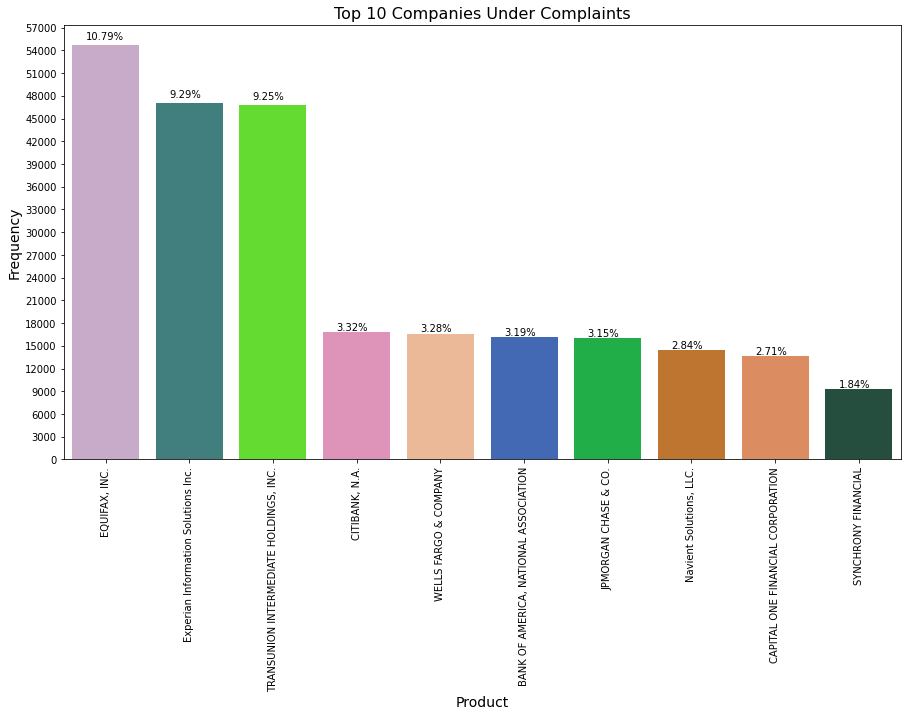

In [ ]:
figure = plt.figure(figsize = [15, 8])

# Generating random colors
colors = []
for i in range(10):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

ax = sns.barplot(data['Company'].value_counts()[0:10].index, data['Company'].value_counts()[0:10], palette  = colors)

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/ total)
  x = p.get_x() + p.get_width() / 5
  y = p.get_y() + p.get_height() * 1.015
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 60000, 3000))
plt.xticks(rotation = 90)
plt.xlabel('Product', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Top 10 Companies Under Complaints', size = 16)
plt.show()

**<h4>Q6:** What is the **complaint rate** per **State**?</h4>

Total States are:  63
States: ['CA' 'FL' 'TX' 'GA' 'NY' 'IL' 'PA' 'NC' 'NJ' 'OH' 'VA' 'MD' 'MI' 'AZ'
 'TN' 'MA' 'WA' 'MO' 'SC' 'NV' 'CO' 'LA' 'AL' 'IN' 'MN' 'CT' 'WI' 'OR'
 'UT' 'KY' 'MS' 'AR' 'OK' 'DC' 'KS' 'DE' 'NM' 'IA' 'HI' 'ID' 'NH' 'NE'
 'RI' 'ME' 'WV' 'PR' 'MT' 'ND' 'SD' 'AK' 'WY' 'VT' 'AE' 'AP' 'GU' 'VI'
 'FM' 'US Minor Islands' 'AA' 'AS' 'MP' 'MH' 'PW']


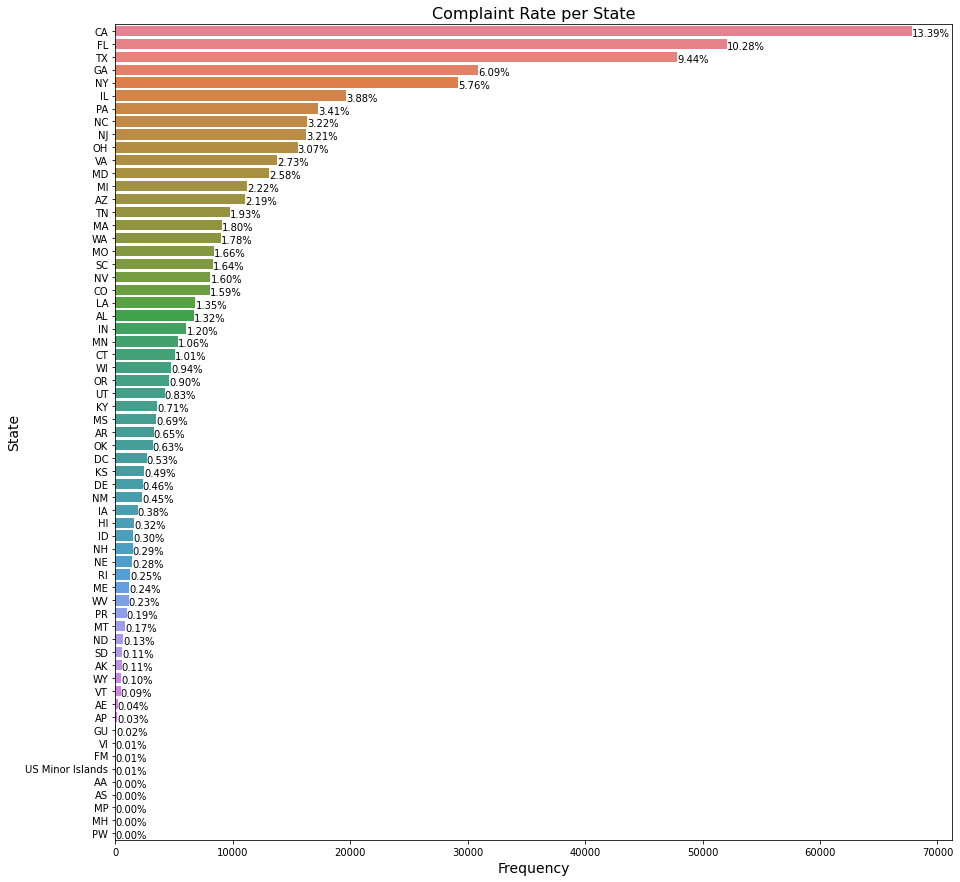

In [ ]:
print('Total States are: ', len(data['State'].value_counts().index))
print('States:', data['State'].value_counts().index.values)
figure = plt.figure(figsize = [15, 15])
ax = sns.barplot(data['State'].value_counts(), data['State'].value_counts().index, palette  = sns.color_palette("husl", len(data['State'].unique())))
total = len(data['State'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel('Frequency', size = 14)
plt.ylabel('State', size = 14)
plt.title('Complaint Rate per State', size = 16)
plt.show()

**Observation:**
California (CA) registered the highest number of complaints, accounting for approximately 13% of total records.

Florida (FL) followed with around 10% of complaints.

Texas (TX) accounted for approximately 9%, followed by other states in decreasing order.

**<h4>Q7:** In what **way**, the **customers** prefered the submitting their **complaint**?</h4>

In [ ]:
print(data['Submitted via'].value_counts())

Web    506625
Name: Submitted via, dtype: int64


**Observation:**

- Observation:

During data cleaning, certain records containing relevant information were likely dropped due to their insignificant volume.

As a result, the profiling report marked the affected feature as a scalar feature.

This feature will be dropped in a later stage of the analysis.

**<h4>Q 8:** Is there any **delay** while **receiving** and **forwarding complaints** to the companies?</h4>

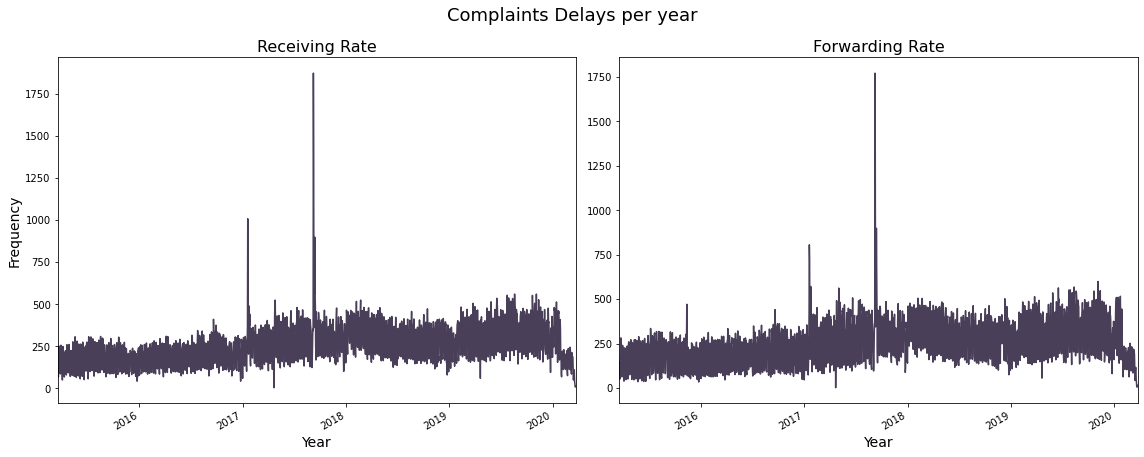

In [ ]:
figure = plt.figure(figsize = [16, 6])
plt.subplot(1,2,1)
data['Date received'].value_counts().plot(kind = 'line', color = '#493F58')
plt.xlabel('Year', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Receiving Rate', size = 16)

plt.subplot(1,2,2)
data['Date sent to company'].value_counts().plot(kind = 'line', color = '#493F58')
plt.xlabel('Year', size = 14)
plt.ylabel('')
plt.title('Forwarding Rate', size = 16)

plt.suptitle('Complaints Delays per year', size = 18, y = 1.05)
plt.tight_layout()
plt.show()

**Observation:**

-The analysis indicates a distortion in the data, suggesting that delays occurred in forwarding certain complaints to the respective companies.



**<h4>Question 9:** What is **frequency** of the **timely response** with respsect to each **product**?</h4>

In [ ]:
timely_response_frame = pd.DataFrame(data2['Timely response?'].value_counts())
timely_response_frame.columns = ['Frequency']
timely_response_frame.transpose()

,Yes,No
Frequency,482823,13338


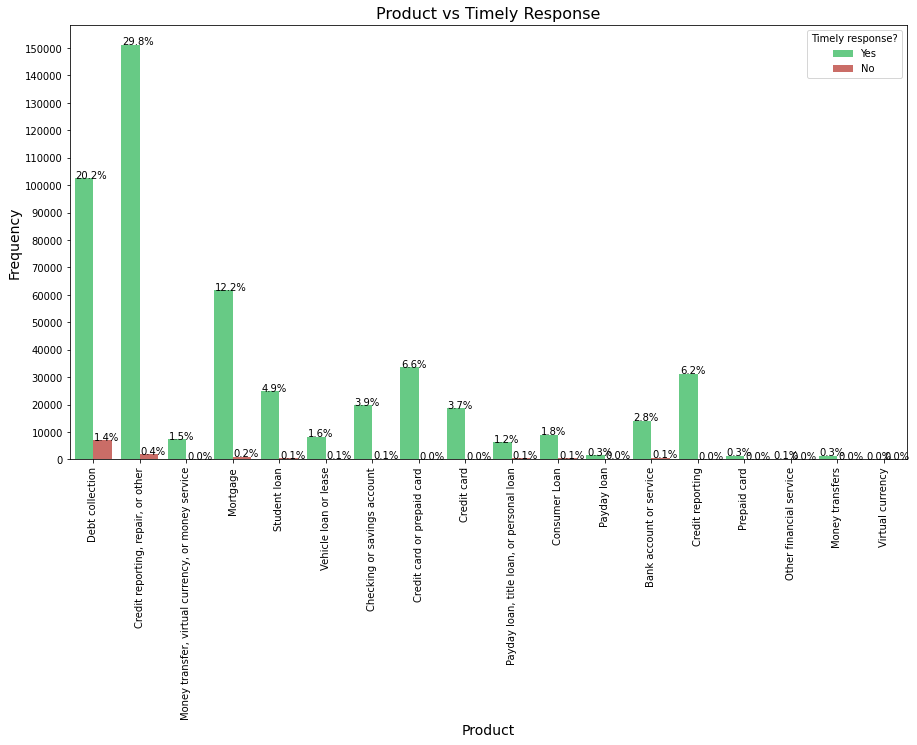

In [ ]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'Product',  data = data, hue = 'Timely response?', palette = ['#56DB7F', '#DB5E56'])

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height() / total)
  x = p.get_x() + p.get_width() / 18
  y = p.get_y() + p.get_height() * 1.001
  ax.annotate(percentage, (x, y))

plt.xlabel('Product', size = 14)
plt.xticks(rotation = 90)
plt.ylabel('Frequency', size = 14)
plt.yticks(range(0, 160000, 10000))
plt.title('Product vs Timely Response', size = 16)
plt.show()

**Observation:**

Credit reporting, repair, and other product complaints were responded to on time at a rate of 29%, with only 0.4% of complaints receiving a late response.

Debt collection showed approximately 1.4% of complaints that were not responded to on time.



**<h4>Question 10:** What is the **dispute** frequency **per product** by customer?</h4>

In [ ]:
dispute_frame = pd.DataFrame(data['Consumer disputed?'].value_counts())
dispute_frame.columns = ['Frequency']
dispute_frame.transpose()

,NA,No,Yes
Frequency,343351,127665,35609


In [ ]:
dispute_frame = pd.DataFrame(data.groupby(by = ['Product', 'Consumer disputed?']).size(), columns = ['Frequency'])
dispute_frame.transpose()

Product            Bank account or service       Checking or savings account  \
Consumer disputed?                      No   Yes                          NA   
Frequency                            11668  3097                       19976   

Product            Consumer Loan       Credit card        \
Consumer disputed?            No   Yes          No   Yes   
Frequency                   7274  2188       14529  4244   

Product            Credit card or prepaid card Credit reporting        \
Consumer disputed?                          NA               No   Yes   
Frequency                                33851            24788  6516   

Product            Credit reporting, repair, or other Debt collection         \
Consumer disputed?                                 NA              NA     No   
Frequency                                      152961           69330  31858   

Product                  Money transfer, virtual currency, or money service  \
Consumer disputed?   Yes                                                 NA   
Frequency           8344                                               7615   

Product            Money transfers      Mortgage               \
Consumer disputed?              No  Yes       NA     No   Yes   
Frequency                     1160  285    30052  24442  8287   

Product            Other financial service     Payday loan       \
Consumer disputed?                      No Yes          No  Yes   
Frequency                              225  64        1501  243   

Product            Payday loan, title loan, or personal loan Prepaid card  \
Consumer disputed?                                        NA           No   
Frequency                                               6717         1238   

Product                 Student loan             Vehicle loan or lease  \
Consumer disputed?  Yes           NA    No   Yes                    NA   
Frequency           207        14290  8974  2127                  8559   

Product            Virtual currency      
Consumer disputed?               No Yes  
Frequency                         8   7

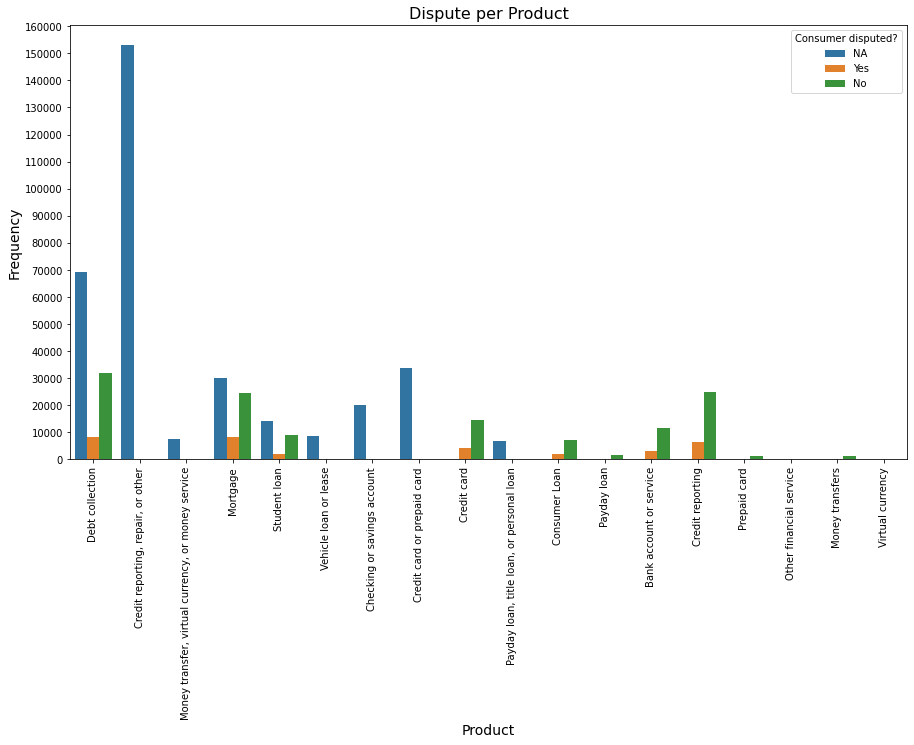

In [ ]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'Product',  data = data, hue = 'Consumer disputed?')
plt.xlabel('Product', size = 14)
plt.xticks(rotation = 90)
plt.ylabel('Frequency', size = 14)
plt.yticks(range(0, 170000, 10000))
plt.title('Dispute per Product', size = 16)
plt.show()

**Observation:**

- Based on the analysis, some customers disputed, some did not, and some did not provide any information regarding disputes.

For the product "Credit reporting, repair, or other", the majority of records indicate no information was provided about dispute status.

Remaining patterns are interpretable from the corresponding graph.



<a id = Section7></a>
# **7. Post Data Processing & Feature Selection**

The primary objective is to build a model; however, data preparation is essential to ensure compatibility with modeling requirements.

Since the data involves textual information, cleaning is necessary before transforming it into numerical representations such as large vectors or Bag of Words.

As the key features for modeling are Product and Consumer Complaint Narrative, only these features will be retained for post-cleaning analysis and modeling.



In [ ]:
data = data[['Product', 'Consumer complaint narrative']]
data.reset_index(drop = True, inplace=True)
print('Data Shape:', data.shape)
data.head()

Data Shape: (507049, 2)


,Product,Consumer complaint narrative
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, repair, or other",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh..."
4,Debt collection,While checking my credit report I noticed thre...


### **Text Cleaning**

- In the Consumer Complaint Narrative feature, the text must be cleaned prior to model ingestion. This involves removing stopwords, eliminating punctuation, and converting all words to lowercase.

A  function will be created to clean and preprocess the raw text effectively.



In [ ]:
stop_words = stopwords.words('english')
def clean_text(text):
  '''
  A function to clean the text.
  '''
  no_punc = [s for s in text if s not in string.punctuation]
  no_punc = ' '.join(no_punc)
  rm_words = [w for w in no_punc.split() if w.lower() not in stop_words]
  return ' '.join(rm_words)

In [ ]:
# Have some patience, might take some time 
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].apply(clean_text)
print('Data Shape:', data.shape)
print('Text Cleaning Accomplished!')
data.head()

Data Shape: (507049, 2)
Text Cleaning Accomplished!


,Product,Consumer complaint narrative
0,Debt collection,transworld systems inc trying collect debt min...
1,"Credit reporting, repair, or other",would like request suppression following items...
2,Debt collection,past 2 weeks receiving excessive amounts telep...
3,"Money transfer, virtual currency, or money ser...",sold access event digitally screenshots detail...
4,Debt collection,checking credit report noticed three collectio...


A new feature will be created to help identify each product category effectively for downstream modeling tasks.



In [ ]:
# Mapping Product to numerical target in new feature
data['Category id'] = data['Product'].factorize()[0]
print('Data Shape:', data.shape)
data.head()

Data Shape: (507049, 3)


,Product,Consumer complaint narrative,Category id
0,Debt collection,transworld systems inc trying collect debt min...,0
1,"Credit reporting, repair, or other",would like request suppression following items...,1
2,Debt collection,past 2 weeks receiving excessive amounts telep...,0
3,"Money transfer, virtual currency, or money ser...",sold access event digitally screenshots detail...,2
4,Debt collection,checking credit report noticed three collectio...,0


A vector will be created for each complaint capturing the frequency of word occurrences using CountVectorizer().

The following example illustrates the intended approach:

**<center>Data Before Applying Count Vectorizer</center>**
<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/Count_vectorizer_example1.PNG"></center>

**<center>Data After Applying Count Vectorizer</center>**
<center><img src = "https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/Count_vectorizer_example2.PNG"></center>

In [ ]:
# Have some patience, might take some time :)
bag_of_words = CountVectorizer()
bag_of_words.fit(data['Consumer complaint narrative'])
input_text = bag_of_words.transform(data['Consumer complaint narrative'])
print('Final Data Shape:',input_text.shape)

Final Data Shape: (507049, 197268)


Now that the input is mapped to vectors, the data is ready for model building.

The next step involves splitting the data into training and testing sets.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_text, data['Category id'], test_size = 0.2, random_state = 42)
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (405639, 197268)
y_train Shape: (405639,)
X_test Shape: (101410, 197268)
y_test Shape: (101410,)


<a id = Section8></a>
# **8. Model Development & Evaluation**

Since the data is imbalanced, a Precision-Recall Curve will be plotted to evaluate performance.

Below is a custom function designed to assist in evaluating model performance.



<a id = Section81></a>
## **8.1 Baseline Models**

<a id = Section811></a>
#### **8.1.1 Random Forest Classifier**

Accuracy Score (Train Data): 0.31
Accuracy Score (Test Data): 0.308
              precision    recall  f1-score   support

           0       0.92      0.01      0.01     21953
           1       0.30      1.00      0.47     30507
           2       0.00      0.00      0.00      1523
           3       0.95      0.05      0.09     12534
           4       0.00      0.00      0.00      5028
           5       0.00      0.00      0.00      1688
           6       0.00      0.00      0.00      4092
           7       0.00      0.00      0.00      6686
           8       0.00      0.00      0.00      3757
           9       0.00      0.00      0.00      1295
          10       0.00      0.00      0.00      1912
          11       0.00      0.00      0.00       353
          12       0.00      0.00      0.00      3010
          13       0.00      0.00      0.00      6339
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00        59
          16 

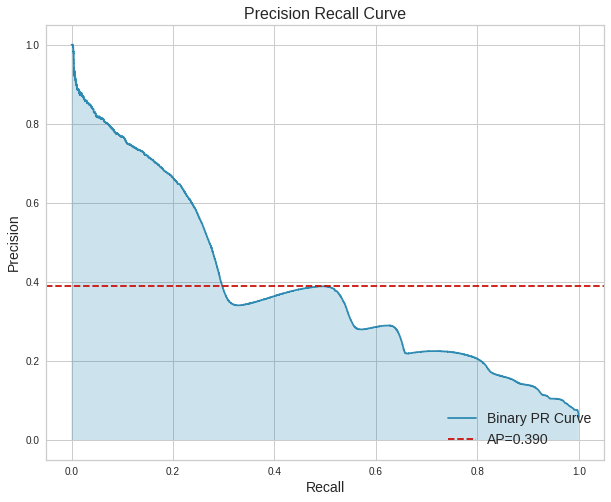

In [ ]:
# Have some patience, might take some time :)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

**Observation:**

The initial model performed poorly, achieving an accuracy of 31% and an average precision of 39%.

One possible reason for low performance could be undersampling of the data.

The next step involves evaluating the performance of the Multinomial Naive Bayes classifier.

<a id = Section81></a>
#### **8.1.2 Multinomial Naive Bayes**

Accuracy Score (Train Data): 0.741
Accuracy Score (Test Data): 0.722
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     21953
           1       0.76      0.78      0.77     30507
           2       0.70      0.59      0.64      1523
           3       0.86      0.94      0.90     12534
           4       0.72      0.89      0.80      5028
           5       0.46      0.59      0.52      1688
           6       0.57      0.79      0.66      4092
           7       0.52      0.77      0.62      6686
           8       0.58      0.34      0.43      3757
           9       0.56      0.22      0.31      1295
          10       0.55      0.22      0.31      1912
          11       0.00      0.00      0.00       353
          12       0.63      0.38      0.48      3010
          13       0.57      0.39      0.46      6339
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00        59
          16

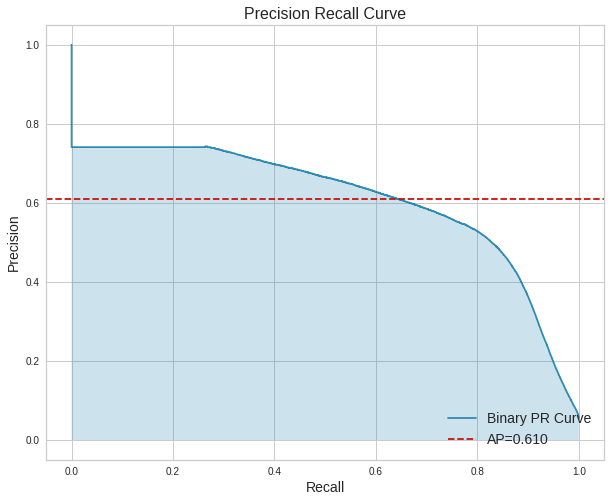

In [ ]:
# Have some patience, might take some time :)
mnc  = MultinomialNB()
mnc.fit(X_train, y_train)
y_pred = mnc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(mnc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(mnc.score(X_test, y_test), decimals = 3))

# Classification Report
mnc_report = classification_report(y_test, y_pred)
print(mnc_report)

**Observation:**

Improvement is observed compared to the previous model.

The accuracy has increased to 72%.

The average precision score has also improved to 61%, but it still requires further enhancement.

Next, the performance of Logistic Regression will be evaluated on this data.



<a id = Section813></a>
#### **8.1.3 Logisitic Regression**

Accuracy Score (Train Data): 0.74
Accuracy Score (Test Data): 0.731
              precision    recall  f1-score   support

           0       0.74      0.84      0.79     21953
           1       0.72      0.85      0.78     30507
           2       0.67      0.57      0.61      1523
           3       0.89      0.90      0.90     12534
           4       0.86      0.78      0.82      5028
           5       0.57      0.37      0.45      1688
           6       0.65      0.69      0.67      4092
           7       0.66      0.65      0.65      6686
           8       0.61      0.42      0.50      3757
           9       0.52      0.28      0.36      1295
          10       0.51      0.28      0.36      1912
          11       0.43      0.06      0.11       353
          12       0.63      0.48      0.54      3010
          13       0.63      0.25      0.36      6339
          14       0.54      0.26      0.35       269
          15       0.20      0.02      0.03        59
          16 

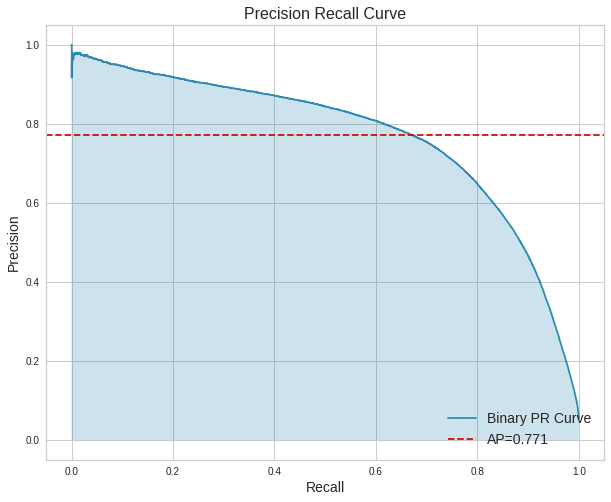

In [ ]:
# Have some patience, might take some time :)
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

A slight improvement is observed over the Multinomial Naive Bayes model.

The accuracy has slightly improved to 73%.

The average precision score has also seen an improvement to 77%.

This improvement is still limited due to the undersampling of minority classes.

In the next section, SMOTE (Synthetic Minority Over-sampling Technique) will be applied to the minority class to evaluate any changes in model performance.



<a id = Section82></a>
## **8.2 Oversampling Models**

### **SMOTE & its Implementation**
SMOTE aims to balance class distribution by increasing the number of minority class examples through synthetic data generation.

It works by synthesizing new instances between existing minority instances using linear interpolation.

SMOTE randomly selects one or more of the k-nearest neighbors for each example in the minority class to create these synthetic examples.

After the oversampling process, the data is reconstructed, and classification models can be applied to the balanced data.

In [ ]:
# Have some patience, may take some time :)
sm = SMOTE(sampling_strategy = 'minority', random_state = 42, n_jobs = -1)
X, y = sm.fit_sample(input_text, data['Category id'])
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (660184, 197268)
y Shape: (660184,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (528147, 197268)
y_train Shape: (528147,)
X_test Shape: (132037, 197268)
y_test Shape: (132037,)


<a id = Section821></a>
#### **8.2.1 Random Forest Classifier**

Accuracy Score (Train Data): 0.428
Accuracy Score (Test Data): 0.427
              precision    recall  f1-score   support

           0       0.92      0.01      0.02     21925
           1       0.33      0.82      0.47     30630
           2       0.00      0.00      0.00      1523
           3       0.93      0.05      0.09     12566
           4       0.00      0.00      0.00      5080
           5       0.00      0.00      0.00      1714
           6       0.00      0.00      0.00      3998
           7       0.00      0.00      0.00      6781
           8       0.00      0.00      0.00      3755
           9       0.00      0.00      0.00      1344
          10       0.00      0.00      0.00      1892
          11       0.00      0.00      0.00       349
          12       0.00      0.00      0.00      2953
          13       0.00      0.00      0.00      6261
          14       0.00      0.00      0.00        58
          15       0.00      0.00      0.00       289
          16

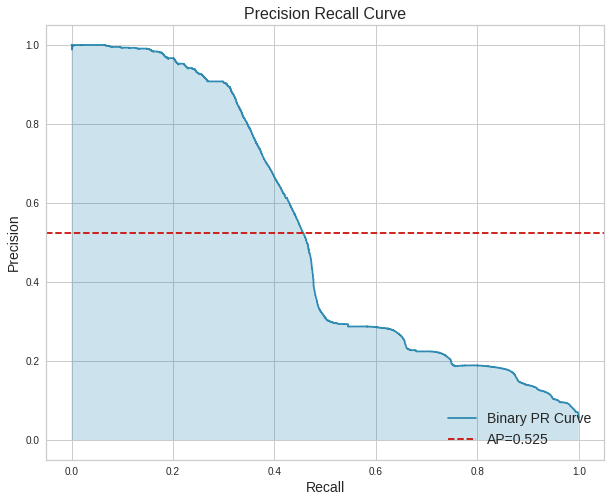

In [ ]:
# Have some patience, might take some time :)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

**Observation:**

- there is a slight improvement compared to the previous Random Forest model.

However, the results are still not much better.



<a id = Section822></a>
#### **8.2.2 Multinomial Naive Bayes**

Accuracy Score (Train Data): 0.802
Accuracy Score (Test Data): 0.785
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     21925
           1       0.76      0.77      0.77     30630
           2       0.71      0.59      0.65      1523
           3       0.85      0.94      0.89     12566
           4       0.72      0.88      0.79      5080
           5       0.48      0.57      0.52      1714
           6       0.55      0.78      0.65      3998
           7       0.52      0.76      0.61      6781
           8       0.59      0.35      0.44      3755
           9       0.52      0.20      0.29      1344
          10       0.54      0.21      0.30      1892
          11       0.00      0.00      0.00       349
          12       0.62      0.37      0.46      2953
          13       0.56      0.38      0.46      6261
          14       0.00      0.00      0.00        58
          15       1.00      0.00      0.01       289
          16

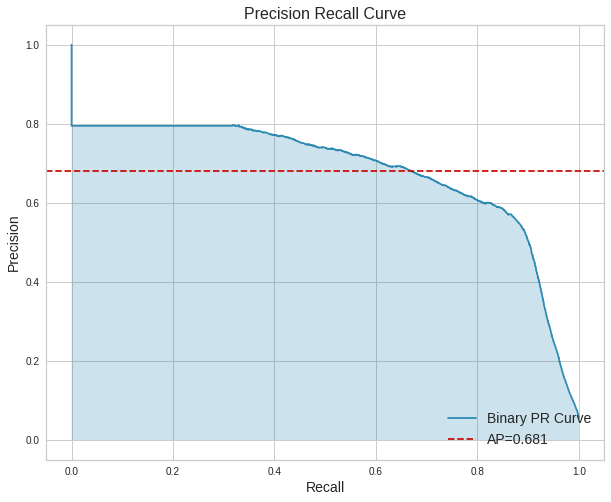

In [ ]:
# Have some patience, might take some time :)
mnc  = MultinomialNB()
mnc.fit(X_train, y_train)
y_pred = mnc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(mnc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(mnc.score(X_test, y_test), decimals = 3))

# Classification Report
mnc_report = classification_report(y_test, y_pred)
print(mnc_report)

**Observation:**

- There is evidence of overfitting, as the training score is higher than the testing score.

However, there is improvement compared to the previous model.

Logistic Regression remains as an option to try next.

<a id = Section823></a>
#### **8.2.3 Logistic Regression**

Accuracy Score (Train Data): 0.799
Accuracy Score (Test Data): 0.791
              precision    recall  f1-score   support

           0       0.74      0.84      0.79     21925
           1       0.72      0.85      0.78     30630
           2       0.70      0.56      0.62      1523
           3       0.90      0.89      0.90     12566
           4       0.86      0.78      0.82      5080
           5       0.57      0.38      0.46      1714
           6       0.67      0.66      0.66      3998
           7       0.65      0.64      0.64      6781
           8       0.60      0.41      0.49      3755
           9       0.51      0.28      0.36      1344
          10       0.50      0.28      0.36      1892
          11       0.52      0.06      0.11       349
          12       0.61      0.49      0.54      2953
          13       0.62      0.24      0.35      6261
          14       0.50      0.03      0.06        58
          15       0.58      0.30      0.40       289
          16

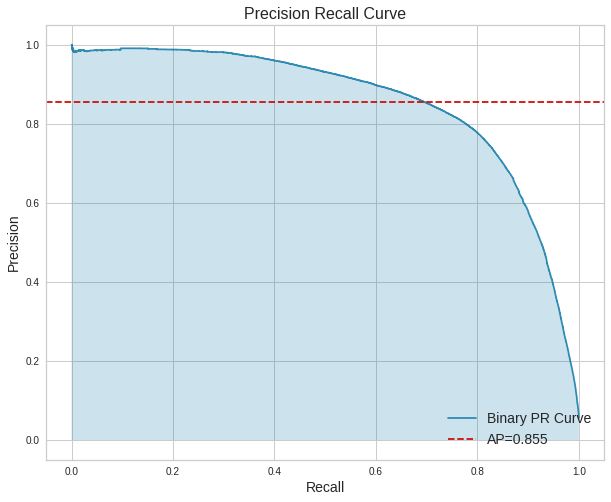

In [ ]:
# Have some patience, might take some time :)
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

**Observation:**

It has performed better than previous models.

The accuracy has improved due to SMOTE, reaching 79%.

The average precision score has also improved, reaching 85%.

An in-depth analysis was performed on the data provided by CFPB.

The features were investigated, and customer sentiments towards the product were chosen for analysis to categorize complaints under the respective categories.

Model development was performed using various models like Random Forest, Multinomial Naive Bayes, and Logistic Regression.

At baseline, these models performed poorly. Therefore, the minority classes were oversampled using SMOTE.

After oversampling, the models were rebuilt and it was found that Logistic Regression outperformed all other models in terms of accuracy and precision